In [19]:
# Basic segmentation based on otsu
# Here the idea is to select sub-Roi and apply basic counting on each
# import sample data
import os
import skimage as ski
filename_Nuc = os.path.join(ski.data_dir, '/Users/zg/Mammouth/PROJECTS/Analysis/Image_Choice/MAX_PMLwt_20_MMStack_Pos0.ome-1-Nuc.tif')
Nucleus_PML = ski.io.imread(filename_Nuc)

filename_PML = os.path.join(ski.data_dir, '/Users/zg/Mammouth/PROJECTS/Analysis/Image_Choice/MAX_PMLwt_20_MMStack_Pos0.ome-1-PML.tif')
PML = ski.io.imread(filename_PML)


In [20]:
import napari
# create a `Viewer` and `Image` layer in Napari
viewer = napari.Viewer()
viewer.add_image(Nucleus_PML, colormap='blue', name='Nucleus PML')
viewer.add_image(PML, colormap='magma', name='PML')

<Image layer 'PML' at 0x1917118e0>

In [21]:
#segmentation using otsu
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label
from skimage.morphology import closing, square, remove_small_objects

# apply threshold on PML bodies
thresh_PML = threshold_otsu(PML)
bw_PML = closing(PML > thresh_PML, square(5))

# remove artifacts connected to image border
cleared = remove_small_objects(clear_border(bw_PML), 10)

# label image regions
label_image_PML = label(cleared)

# add the labels
labels_layer = viewer.add_labels(label_image_PML, name='segmentation-PML')

In [22]:
label_image_PML;


In [23]:
# apply threshold on Nucleus
thresh_Nuc = threshold_otsu(Nucleus_PML)
bw_Nuc = closing(Nucleus_PML > thresh_Nuc, square(13))

# remove artifacts connected to image border
cleared = remove_small_objects(clear_border(bw_Nuc), 10)

# label image regions
label_image_Nuc = label(cleared)

# add the labels
labels_layer = viewer.add_labels(label_image_Nuc, name='segmentation-Nucleus')


In [24]:
Mask=viewer.layers[2].data

In [25]:
Result_PML=Mask*PML; #unclear if it is required
viewer.add_image(Result_PML)

<Image layer 'Result_PML' at 0x192c4db20>

In [26]:
# Here is the generalized version 
import numpy as np
import napari
# Assuming you have loaded your label image into label_image_Nuc
# Assuming you have loaded your Nucleus_PML image into Nucleus_PML

# Get unique label values from the label image
unique_labels = np.unique(label_image_Nuc)

# Remove background label if exists
unique_labels = unique_labels[unique_labels != 0]

# Initialize a list to store extracted ROIs and corresponding results
roi_list = []
result_list = []

# Extract each ROI by its label value and perform desired operation (multiplication with Nucleus_PML in this case)
for label in unique_labels:
    # Extract the ROI with the current label value
    roi = np.where(label_image_Nuc == label, 1, 0)
    roi_list.append(roi)
    
    # Perform desired operation on the ROI (e.g., multiplication with Nucleus_PML)
    result_roi = Nucleus_PML * roi
    result_list.append(result_roi)

# Display each extracted ROI and result using napari
viewer = napari.Viewer()
for i, (roi, result_roi) in enumerate(zip(roi_list, result_list)):
    viewer.add_image(roi, name=f'ROI_{unique_labels[i]}')
    viewer.add_image(result_roi, name=f'Result_ROI_{unique_labels[i]}')

napari.run()

In [27]:
from skimage import measure
import pandas as pd

# Assuming you have loaded your label image into label_image_Nuc
# Assuming you have loaded your Nucleus_PML image into Nucleus_PML

# Get unique label values from the label image
unique_labels = np.unique(label_image_Nuc)

# Remove background label if exists
unique_labels = unique_labels[unique_labels != 0]

# Initialize lists to store region properties
area_list = []
mean_intensity_list = []

# Extract each ROI by its label value and calculate region properties
for label in unique_labels:
    # Extract the ROI with the current label value
    roi = np.where(label_image_Nuc == label, 1, 0)
    
    # Calculate properties for the ROI using result_roi
    #result_roi = Nucleus_PML * roi
    #result_roi_bodies = PML * roi
    Product= roi*label_image_PML
    region_properties = measure.regionprops_table(Product, PML, properties=['area', 'mean_intensity'])
    #region_properties = measure.regionprops_table(roi, result_roi, properties=['area', 'mean_intensity'])
    #region_properties_bodies = measure.regionprops_table(roi, result_roi, properties=['area', 'mean_intensity'])
    # Store the calculated properties in lists
    #area_list.append(region_properties['area'][0])
    #mean_intensity_list.append(region_properties['mean_intensity'][0])
    
    #pixel size
   
pix_size=6.45/63;
pix_size_square = pix_size ** 2
area_list = [area * pix_size_square for area in area_list]
# Create a DataFrame to store the region properties
region_properties_df_Nucleus_PML = pd.DataFrame({'Area': area_list, 'Mean_Intensity': mean_intensity_list})

# Display the DataFrame
region_properties_df_Nucleus_PML

,Area,Mean_Intensity


In [28]:
import numpy as np
import napari
unique_labels = np.unique(label_image_PML)



# Remove background label if exists
unique_labels = unique_labels[unique_labels != 0]

# Initialize a list to store extracted ROIs and corresponding results
roi_list = []
result_list = []

# Extract each ROI by its label value and perform desired operation (multiplication with Nucleus_PML in this case)
for label in unique_labels:
    # Extract the ROI with the current label value
    roi = np.where(label_image_PML == label, 1, 0)
    roi_list.append(roi)
    
    # Perform desired operation on the ROI (e.g., multiplication with Nucleus_PML)
    result_roi = Nucleus_PML * roi
    result_list.append(result_roi)

# Display each extracted ROI and result using napari
viewer = napari.Viewer()
for i, (roi, result_roi) in enumerate(zip(roi_list, result_list)):
    viewer.add_image(roi, name=f'ROI_{unique_labels[i]}')
    viewer.add_image(result_roi, name=f'Result_ROI_{unique_labels[i]}')

napari.run()


In [30]:
from skimage import measure
import pandas as pd

# Assuming you have loaded your label image into label_image_PML
# Assuming you have loaded your Nucleus_PML image into Nucleus_PML

# Get unique label values from the label image
unique_labels = np.unique(label_image_PML)

# Remove background label if exists
unique_labels = unique_labels[unique_labels != 0]

# Initialize lists to store region properties
area_list = []
mean_intensity_list = []

# Extract each ROI by its label value and calculate region properties
for label in unique_labels:
    # Extract the ROI with the current label value
    roi = np.where(label_image_PML == label, 1, 0)
    # à tester : roi = label_image_PML == label
    # Calculate properties for the ROI using result_roi
    result_roi = Nucleus_PML * roi
    region_properties = measure.regionprops_table(roi, result_roi, properties=['area', 'mean_intensity'])
    
    # Store the calculated properties in lists
    area_list.append(region_properties['area'][0])
    mean_intensity_list.append(region_properties['mean_intensity'][0])

# Modify region properties by multiplying them by the square of pixel size
pix_size=6.45/63;
area_list = [area * pix_size_square for area in area_list]

# Create a DataFrame to store the region properties
region_properties_df_PML = pd.DataFrame({'Area': area_list, 'Mean_Intensity': mean_intensity_list})

# Display the DataFrame
print(region_properties_df_PML)



        Area  Mean_Intensity
0   0.167710     1175.187500
1   0.566020     1178.574074
2   0.702285     1172.328358
3   0.754694     1226.555556
4   0.744212     1243.661972
5   0.754694     1313.569444
6   0.188673     1349.500000
7   0.125782      291.666667
8   0.482166      988.173913
9   0.597466     1318.508772
10  0.702285     1235.000000
11  1.194932     1458.508772
12  0.503129     1711.041667
13  0.576502     2251.418182
14  0.712766     2159.000000
15  0.136264     1074.076923
16  0.199155     1635.315789
17  0.398311     1642.263158
18  0.513611     1344.734694
19  1.132041     1508.416667
20  0.566020     1140.425926


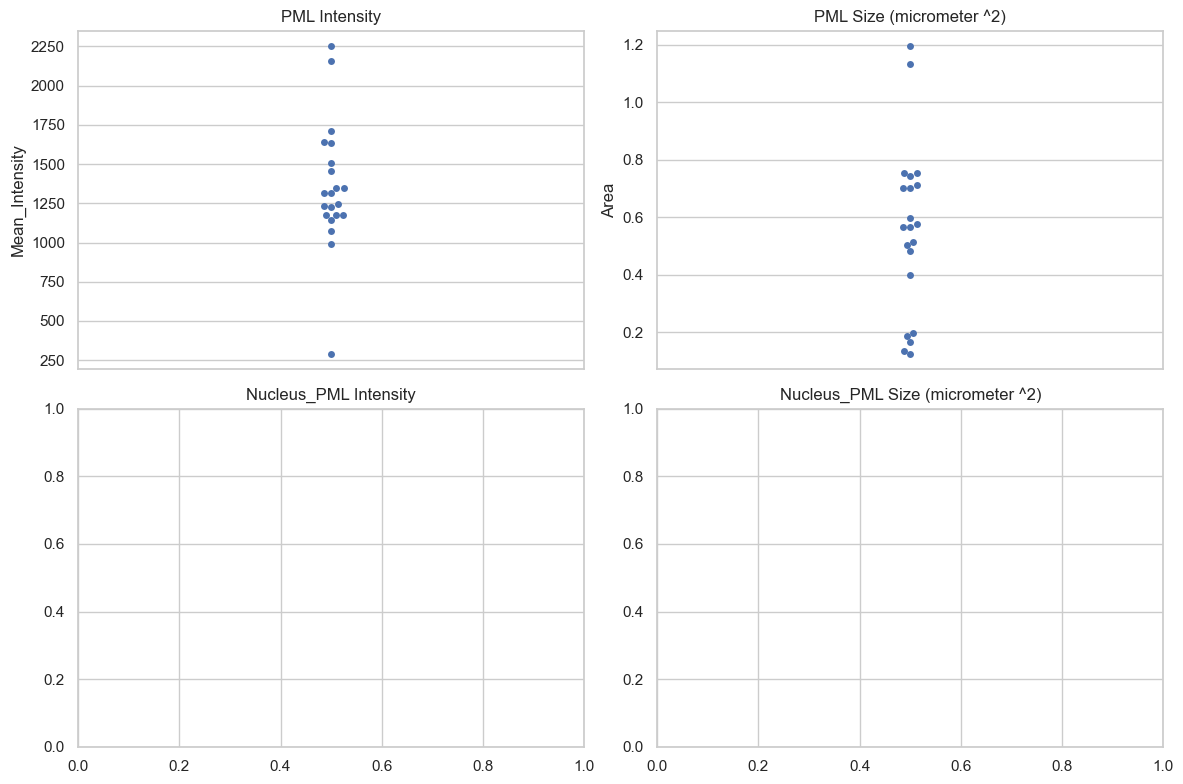

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have two DataFrames: region_properties_df_PML and region_properties_df_Nucleus_PML
# Each DataFrame has two columns: 'Mean_Intensity' and 'Area'

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Swarm plot for PML intensity
plt.subplot(2, 2, 1)
sns.swarmplot(y='Mean_Intensity', data=region_properties_df_PML)
plt.title('PML Intensity')
plt.xlabel('')

# Swarm plot for PML size
plt.subplot(2, 2, 2)
sns.swarmplot(y='Area', data=region_properties_df_PML)
plt.title('PML Size (micrometer ^2)')
plt.xlabel('')

# Swarm plot for Nucleus_PML intensity
plt.subplot(2, 2, 3)
sns.swarmplot(y='Mean_Intensity', data=region_properties_df_Nucleus_PML)
plt.title('Nucleus_PML Intensity')

# Swarm plot for Nucleus_PML size
plt.subplot(2, 2, 4)
sns.swarmplot(y='Area', data=region_properties_df_Nucleus_PML)
plt.title('Nucleus_PML Size (micrometer ^2)')

plt.tight_layout()
plt.show()

In [29]:
print(region_properties_df_Nucleus_PML)

Empty DataFrame
Columns: [Area, Mean_Intensity]
Index: []
